In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import seaborn as sns
import os
import datetime
import json

In [2]:
import json
from urllib.request import urlopen

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from highlight_text import fig_text

from mplsoccer import Bumpy, FontManager, add_image

In [3]:
epl = Image.open(
    urlopen("https://raw.githubusercontent.com/andrewRowlinson/mplsoccer-assets/main/epl.png")
)

season_dict = json.load(
    urlopen("https://raw.githubusercontent.com/andrewRowlinson/mplsoccer-assets/main/epl.json")
)

player_dict = json.load(
    urlopen("https://raw.githubusercontent.com/andrewRowlinson/mplsoccer-assets/main/"
            "percentile.json")
)

In [6]:
# font_normal = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
#                           "roboto/Roboto%5Bwdth,wght%5D.ttf")
font_bold = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                        "robotoslab/RobotoSlab%5Bwght%5D.ttf")

In [7]:
matchday = range(1,39)
dfs = []
for i in matchday:
    site = requests.get('https://www.worldfootball.net/schedule/eng-premier-league-2022-2023-spieltag/{}/'.format(i)).text
    df = pd.read_html(site)[3]
    df['Matchday'] = 'Matchday ' + str(i)
    df['Matchday Num'] = str(i)
    df['PL Position'] = (df.index + 1).astype(str)
    dfs.append(df)
    
final_df = pd.concat(dfs, ignore_index = True)

In [8]:
final_df = final_df.drop(columns = ['Team'])

In [9]:
final_df = final_df.drop(columns = ['#'])

In [10]:
final_df = final_df.rename(columns={"Team.1": "Team"})

In [11]:
final_df

,Team,M.,W,D,L,goals,Dif.,Pt.,Matchday,Matchday Num,PL Position
0,Tottenham Hotspur,1,1,0,0,4:1,3,3,Matchday 1,1,1
1,AFC Bournemouth,1,1,0,0,2:0,2,3,Matchday 1,1,2
2,Arsenal FC,1,1,0,0,2:0,2,3,Matchday 1,1,3
3,Manchester City,1,1,0,0,2:0,2,3,Matchday 1,1,4
4,Newcastle United,1,1,0,0,2:0,2,3,Matchday 1,1,5
...,...,...,...,...,...,...,...,...,...,...,...
755,Nottingham Forest,38,9,11,18,38:68,-30,38,Matchday 38,38,16
756,Everton FC,38,8,12,18,34:57,-23,36,Matchday 38,38,17
757,Leicester City,38,9,7,22,51:68,-17,34,Matchday 38,38,18
758,Leeds United,38,7,10,21,48:78,-30,31,Matchday 38,38,19


In [12]:
matchday_columns = ["Week {}".format(i + 1) for i in range(0,38)]

In [13]:
ult_df = pd.DataFrame(columns = matchday_columns + ['Team'])

In [14]:
all_teams = final_df.Team.unique()

In [15]:
for i, team in enumerate(all_teams):
#     print(i)
    
    team_positions = final_df[final_df.Team == team].iloc[:,10].values
    
    some_df = pd.DataFrame([team_positions], columns = matchday_columns)
    some_df['Team'] = team
    ult_df = ult_df.append(some_df, ignore_index=True)
    
    

In [16]:
ult_df = ult_df.T

In [17]:
ult_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Week 1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Week 2,4,11,2,1,5,8,6,7,3,13,15,12,20,14,18,9,16,10,19,17
Week 3,4,15,1,2,6,5,3,12,8,7,19,16,14,18,17,13,9,10,20,11
Week 4,3,17,1,2,7,4,5,6,10,11,20,9,8,19,18,15,12,14,16,13
Week 5,3,16,1,2,12,4,7,10,11,8,20,6,5,18,17,19,13,15,14,9
Week 6,3,13,1,2,11,4,9,6,8,10,20,7,5,14,16,17,15,19,18,12
Week 7,4,15,1,2,10,3,8,11,7,9,20,6,5,16,17,13,12,19,18,14
Week 8,4,13,1,2,10,3,9,11,8,5,20,7,6,17,15,12,14,19,18,16
Week 9,4,14,1,2,6,3,11,8,10,7,19,5,9,18,13,12,15,20,17,16
Week 10,3,13,1,2,5,4,11,6,10,9,20,8,7,18,15,12,14,19,16,17


In [18]:
ult_df.columns = ult_df.iloc[-1].values

In [19]:
ult_df = ult_df.iloc[:-1]

In [20]:
ult_df.head()

,Tottenham Hotspur,AFC Bournemouth,Arsenal FC,Manchester City,Newcastle United,Brighton & Hove Albion,Leeds United,Chelsea FC,Brentford FC,Fulham FC,Leicester City,Liverpool FC,Manchester United,Wolverhampton Wanderers,Everton FC,Aston Villa,Crystal Palace,Nottingham Forest,West Ham United,Southampton FC
Week 1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Week 2,4,11,2,1,5,8,6,7,3,13,15,12,20,14,18,9,16,10,19,17
Week 3,4,15,1,2,6,5,3,12,8,7,19,16,14,18,17,13,9,10,20,11
Week 4,3,17,1,2,7,4,5,6,10,11,20,9,8,19,18,15,12,14,16,13
Week 5,3,16,1,2,12,4,7,10,11,8,20,6,5,18,17,19,13,15,14,9


In [21]:
ult_df.dtypes

Tottenham Hotspur          object
AFC Bournemouth            object
Arsenal FC                 object
Manchester City            object
Newcastle United           object
Brighton & Hove Albion     object
Leeds United               object
Chelsea FC                 object
Brentford FC               object
Fulham FC                  object
Leicester City             object
Liverpool FC               object
Manchester United          object
Wolverhampton Wanderers    object
Everton FC                 object
Aston Villa                object
Crystal Palace             object
Nottingham Forest          object
West Ham United            object
Southampton FC             object
dtype: object

In [22]:
ult_df = ult_df.apply(pd.to_numeric, errors='coerce')

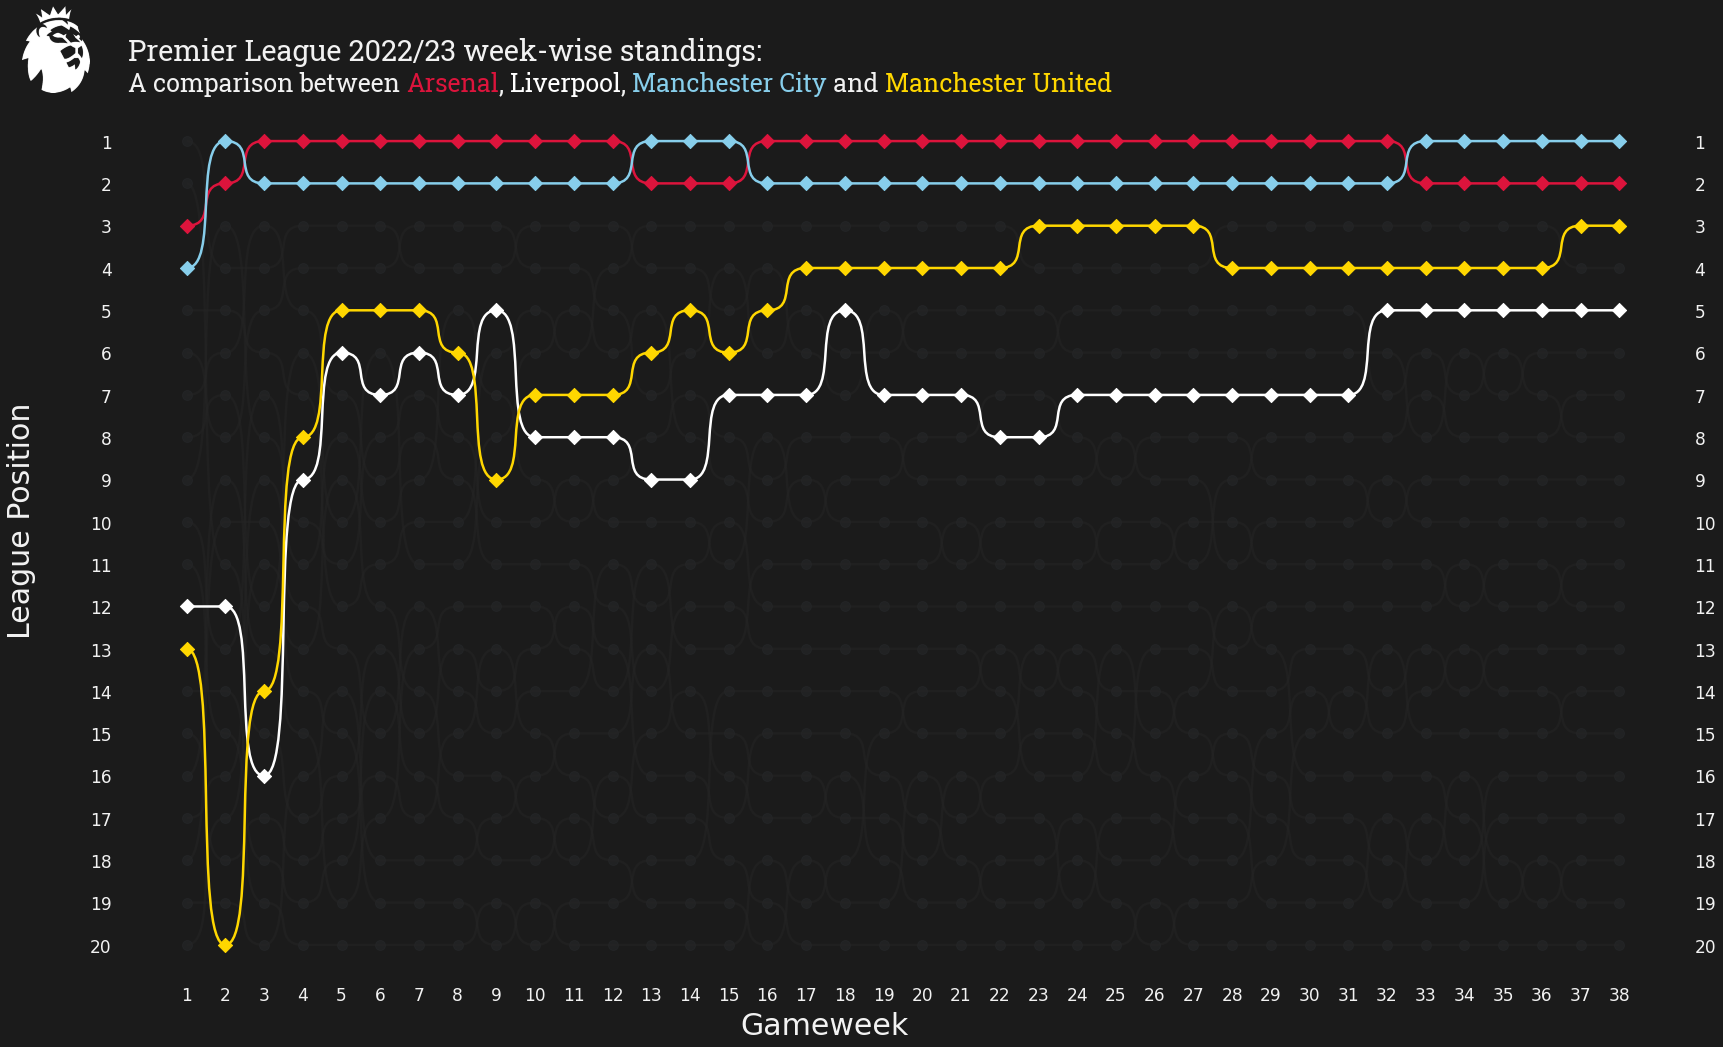

In [23]:
match_day = [str(num) for num in range(1, 39)]

# highlight dict --> team to highlight and their corresponding colors
highlight_dict = {
    "Liverpool FC": "white",
    "Manchester City": "skyblue",
    "Manchester United": "gold",
    "Arsenal FC": "crimson"
}

bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    rotate_xticks=0,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065  # x label alignment
)
fig,ax = bumpy.plot(
    x_list = match_day,
    y_list = np.linspace(1, 20, 20).astype(int),
    values = ult_df,
    secondary_alpha = .5,
    highlight_dict = highlight_dict,
    figsize = (25,15),
    y_label = 'League Position',
    x_label = 'Gameweek',
    ylim = (0.1,22),
    lw = 2.5
)

ax.xaxis.set_label_coords(0.45, -0.03)
ax.yaxis.set_label_coords(-.05, 0.5)

TITLE = "Premier League 2022/23 week-wise standings:"
SUB_TITLE = "A comparison between <Arsenal>, <Liverpool>, <Manchester City> and <Manchester United>"

# add title
fig.text(0.09, 0.95, TITLE, size=29, color="#F2F2F2", fontproperties=font_bold.prop)

# add subtitle
fig_text(
    0.09, 0.94, SUB_TITLE, color="#F2F2F2",
    highlight_textprops=[{"color": 'crimson'}, {"color": 'white'}, {"color": 'skyblue'},
                        {"color": 'gold'}],
    size=25, fig=fig, fontproperties=font_bold.prop
)

# add image
fig = add_image(
     epl,
     fig,  # figure
     0.01, 0.92,  # left and bottom dimensions
     0.08, 0.08  # height and width values
)

# if space is left in the plot use this
plt.tight_layout(pad=5)

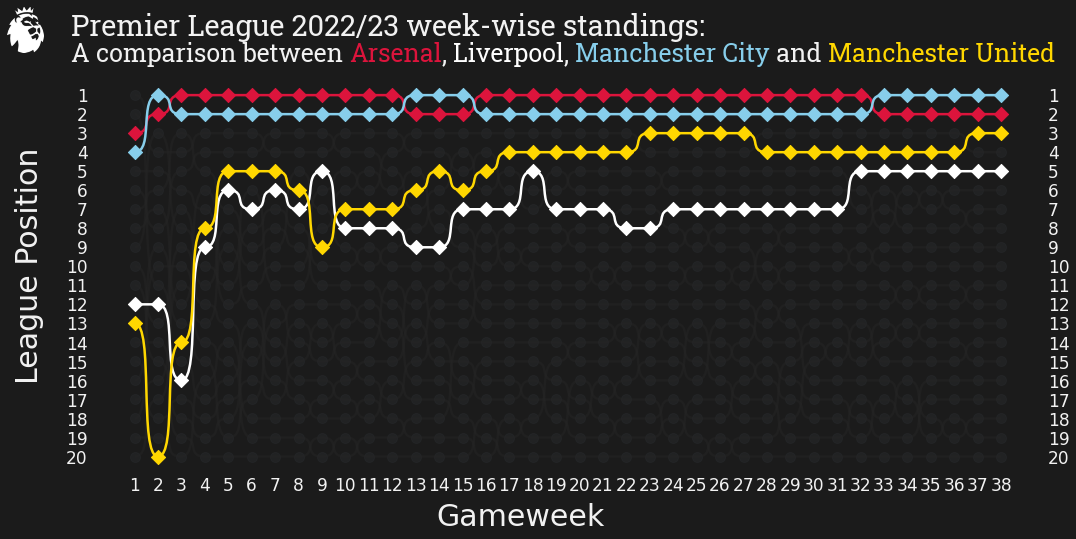

In [24]:
match_day = [str(num) for num in range(1, 39)]

# highlight dict --> team to highlight and their corresponding colors
highlight_dict = {
    "Liverpool FC": "white",
    "Manchester City": "skyblue",
    "Manchester United": "gold",
    "Arsenal FC": "crimson"
}

bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    rotate_xticks=0,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065  # x label alignment
)
fig,ax = bumpy.plot(
    x_list = match_day,
    y_list = np.linspace(1, 20, 20).astype(int),
    values = ult_df,
    secondary_alpha = .5,
    highlight_dict = highlight_dict,
    figsize = (16,8),
    y_label = 'League Position',
    x_label = 'Gameweek',
    ylim = (0.1,22),
    lw = 2.5
)

ax.xaxis.set_label_coords(0.45, -0.07)
ax.yaxis.set_label_coords(-.05, 0.5)

TITLE = "Premier League 2022/23 week-wise standings:"
SUB_TITLE = "A comparison between <Arsenal>, <Liverpool>, <Manchester City> and <Manchester United>"

# add title
fig.text(0.09, 0.95, TITLE, size=29, color="#F2F2F2", fontproperties=font_bold.prop)

# add subtitle
fig_text(
    0.09, 0.94, SUB_TITLE, color="#F2F2F2",
    highlight_textprops=[{"color": 'crimson'}, {"color": 'white'}, {"color": 'skyblue'},
                        {"color": 'gold'}],
    size=25, fig=fig, fontproperties=font_bold.prop
)

# add image
fig = add_image(
     epl,
     fig,  # figure
     0.01, 0.92,  # left and bottom dimensions
     0.08, 0.08  # height and width values
)

# if space is left in the plot use this
plt.tight_layout(pad=5)

In [ ]:
df = final_df